In [1]:
import os
import pickle
import numpy as np

from openmmtools.multistate import MultiStateReporter, MultiStateSamplerAnalyzer

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [2]:
def generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=None):
    """
    Generate replica mixing plot for a particular phase of a mutation
    Adapted from mixing plots in Yank: https://github.com/choderalab/yank/blob/master/Yank/reports/notebook.py#L319

    Parameters
    ----------
    transition_matrix : [n, 6] np.ndarray
        transition matrix generated by openmmtools.MultiStateSamplerAnalyzer.generate_mixing_statistics()
    eigenvalues : [n, 5] np.ndarray
        eigenvalues generated by openmmtools.MultiStateSamplerAnalyzer.generate_mixing_statistics()
    statistical_inefficiency : float
        replica statistical inefficiency generated by openmmtools.MultiStateSamplerAnalyzer.generate_mixing_statistics()
    mutation : str
        name of mutation (format: {single letter amino acid for WT}-{residue id}-{single letter aminon acid for mutant})
    phase : str
        phase of simulation (e.g., 'complex')
    save_path : str
        filepath at which to save the figure
    """
    
    # Set figure size
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(8, 10), squeeze=True)

    # Set font size
    plt.rc('font', size=26) 

    # Set color map
    colors = ["white", "#1C73D6"] # first color is white, last is blue
    cmap = LinearSegmentedColormap.from_list("BlueWhite", colors)

    # Plot
    output_image = plt.imshow(transition_matrix, aspect='equal', cmap=cmap, vmin=0, vmax=1)

    # Add colorbar.
    decimal = 1
    nticks = 11
    cbar = plt.colorbar(output_image, 
                        orientation='vertical', 
                        format='%.{}f'.format(decimal),
                        fraction=0.0455
                       )

    # Set ticks.
    ticks = np.linspace(0, 1, nticks)
    cbar.set_ticks(ticks)

    # Label axes   
    plt.xlabel("State")
    plt.ylabel("State")

    # Set title
    perron_eigenvalue = eigenvalues[1]
    equilibration_timescale = 1.0 / (1.0 - perron_eigenvalue)
    g_regex = r"$g$"
    subtitle_text = (f'Perron eigenvalue: {round(perron_eigenvalue, 2)}\n'
                     f'State equil timescale: ~{round(equilibration_timescale, 2)} iterations\n'
                     f'Replica state index {g_regex}: {round(statistical_inefficiency, 2)}\n')
    plt.suptitle(subtitle_text, fontsize=26, x=0.52, y=0.74)
    plt.title(f"Transition matrix for {mutation} {phase}", fontsize=28, y=1.27)
    
    # Ensure x-axis labels are not cut off
    plt.tight_layout()

    # Save plot as pdf
    if save_path:
        plt.savefig(save_path, dpi=500)
        plt.show()
    else:
        plt.show()


# Dipeptide

## ACE, NME caps

/scratch/lsftmp/15339988.tmpdir/ipykernel_72639/914325174.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

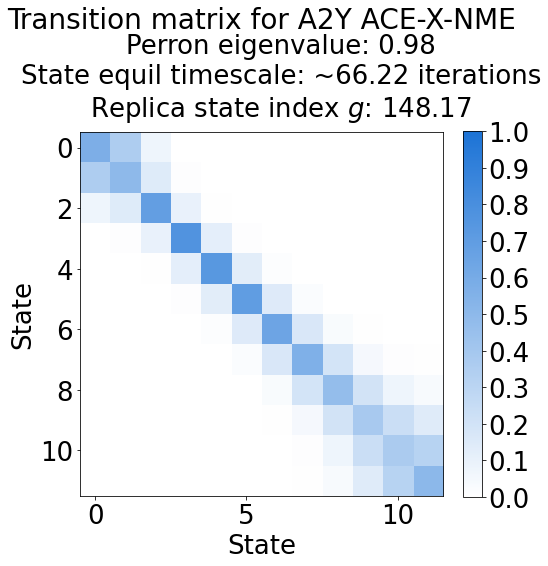

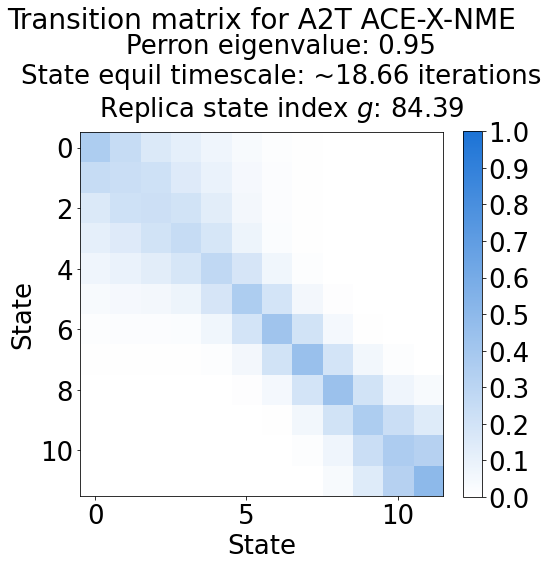

In [10]:
main_dir = 46
phase = 'apo'
replicate = 0
sub_dirs = [11, 13]
mutations = ["A2Y", "A2T"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"

#     # Get mixing data
#     reporter = MultiStateReporter(filename, open_mode='r')
#     analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=5000)
#     transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()
    
#     # Save pickle
#     mixing_data = [transition_matrix, eigenvalues, statistical_inefficiency]
#     with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "wb") as f:
#         pickle.dump(mixing_data, f)
    
    # Load data
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "rb") as f:
        mixing_data = pickle.load(f)
        transition_matrix, eigenvalues, statistical_inefficiency = mixing_data
        
    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_ACE_NME_mixing_5ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, "ACE-X-NME", save_path=save_path)


/scratch/lsftmp/15339988.tmpdir/ipykernel_72639/153159812.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

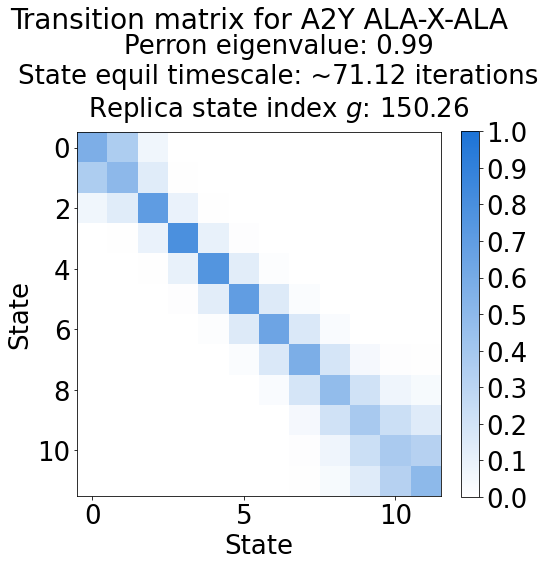

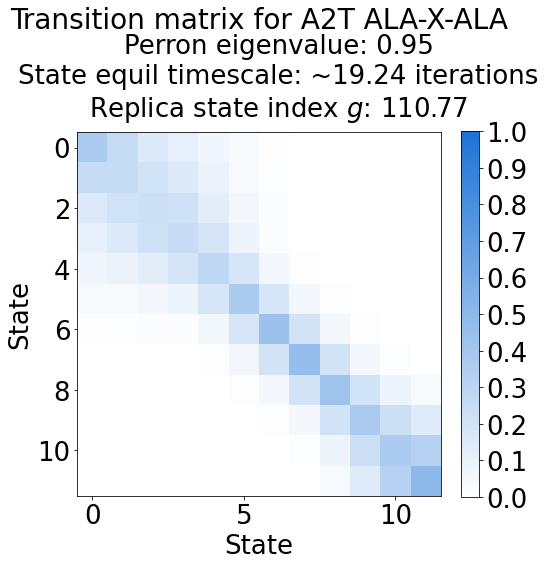

In [4]:
main_dir = 46
phase = 'apo'
replicate = 0
sub_dirs = [31, 33]
mutations = ["A2Y", "A2T"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"

#     # Get mixing data
#     reporter = MultiStateReporter(filename, open_mode='r')
#     analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=5000)
#     transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()
    
#     # Save pickle
#     mixing_data = [transition_matrix, eigenvalues, statistical_inefficiency]
#     with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "wb") as f:
#         pickle.dump(mixing_data, f)
    
    # Load data
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "rb") as f:
        mixing_data = pickle.load(f)
        transition_matrix, eigenvalues, statistical_inefficiency = mixing_data
    
    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_ALA_mixing_5ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, "ALA-X-ALA", save_path=save_path)


# Barnase:barstar (AREX)

## Apo

/scratch/lsftmp/15339988.tmpdir/ipykernel_72639/1116730450.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

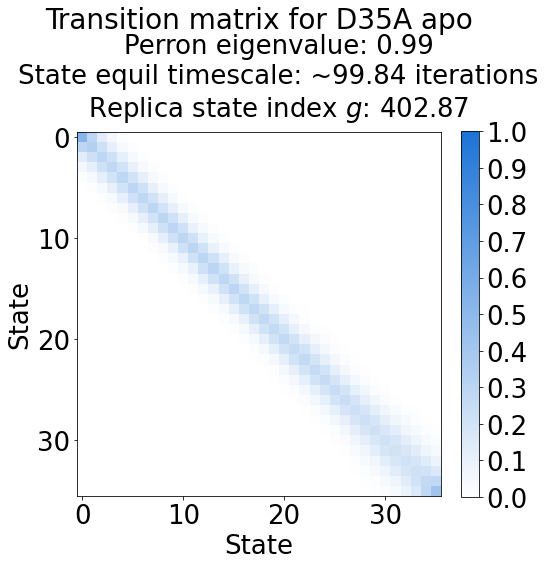

In [5]:
main_dir = 47
phase = 'apo'
replicate = 1
sub_dirs = [7]
mutations = ["D35A"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"

#     # Get mixing data
#     reporter = MultiStateReporter(filename, open_mode='r')
#     analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=10000)
#     transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

#     # Save pickle
#     mixing_data = [transition_matrix, eigenvalues, statistical_inefficiency]
#     with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "wb") as f:
#         pickle.dump(mixing_data, f)
    
    # Load data
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "rb") as f:
        mixing_data = pickle.load(f)
        transition_matrix, eigenvalues, statistical_inefficiency = mixing_data
    
    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_10ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)


/scratch/lsftmp/15339988.tmpdir/ipykernel_72639/3896201230.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

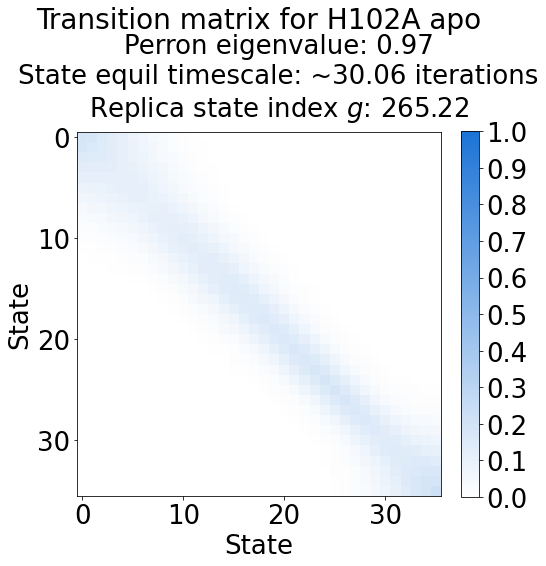

In [6]:
main_dir = 47
phase = 'apo'
replicate = 1
sub_dirs = [13]
mutations = ["H102A"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"

#     # Get mixing data
#     reporter = MultiStateReporter(filename, open_mode='r')
#     analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=10000)
#     transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

#     # Save pickle
#     mixing_data = [transition_matrix, eigenvalues, statistical_inefficiency]
#     with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "wb") as f:
#         pickle.dump(mixing_data, f)
    
    # Load data
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "rb") as f:
        mixing_data = pickle.load(f)
        transition_matrix, eigenvalues, statistical_inefficiency = mixing_data
    
    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_10ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)


## Complex

/scratch/lsftmp/15339988.tmpdir/ipykernel_72639/2518695923.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

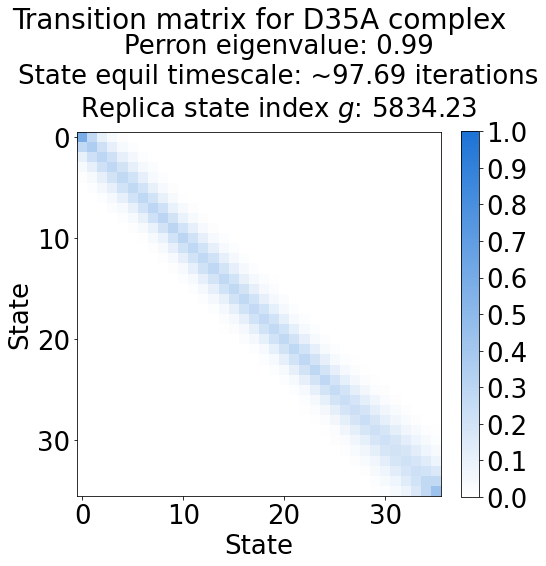

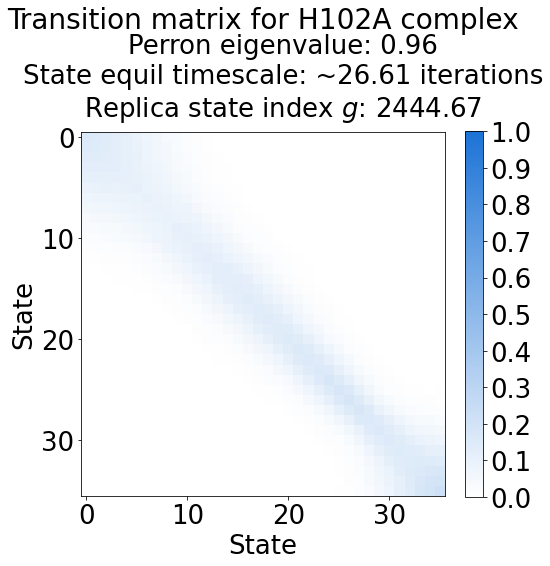

In [7]:
main_dir = 47
phase = 'complex'
replicate = 1
sub_dirs = [7, 13]
mutations = ["D35A", "H102A"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    
#     # Get mixing data
#     reporter = MultiStateReporter(filename, open_mode='r')
#     analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=10000)
#     transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()
    
#     # Save pickle
#     mixing_data = [transition_matrix, eigenvalues, statistical_inefficiency]
#     with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "wb") as f:
#         pickle.dump(mixing_data, f)
    
    # Load data
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "rb") as f:
        mixing_data = pickle.load(f)
        transition_matrix, eigenvalues, statistical_inefficiency = mixing_data
        
    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_10ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)


# Barnase:barstar (AREST)

## Complex

/scratch/lsftmp/15339988.tmpdir/ipykernel_72639/4126813651.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

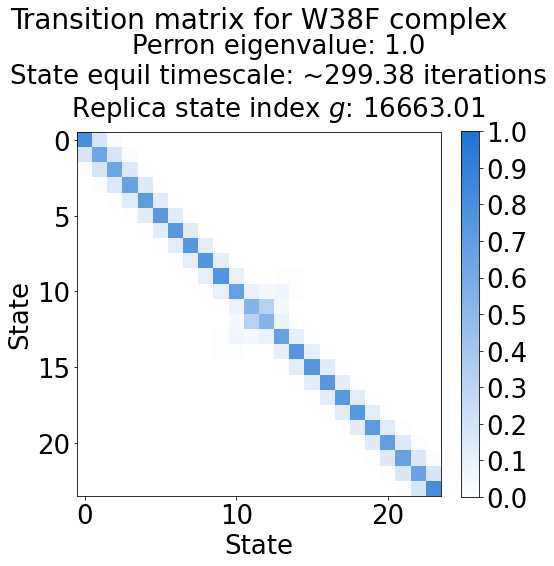

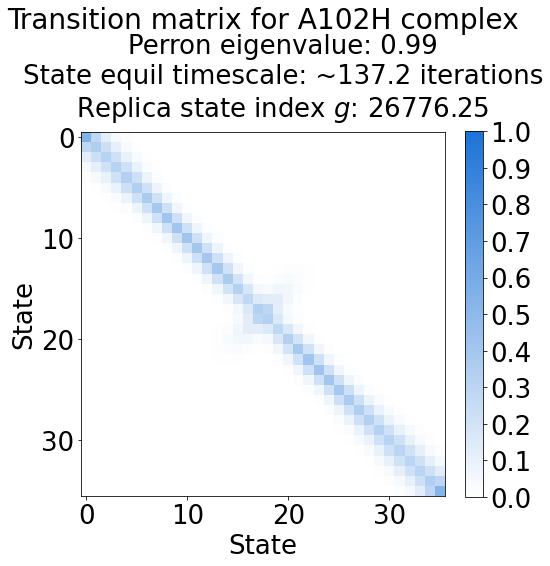

In [8]:
main_dir = 52
phase = 'complex'
replicate = 0
sub_dirs = [2, 27]
mutations = ["W38F", "A102H"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    
#     # Get mixing data
#     reporter = MultiStateReporter(filename, open_mode='r')
#     analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=50000)
#     transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()
    
#     # Save pickle
#     mixing_data = [transition_matrix, eigenvalues, statistical_inefficiency]
#     with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "wb") as f:
#         pickle.dump(mixing_data, f)
    
    # Load data
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "rb") as f:
        mixing_data = pickle.load(f)
        transition_matrix, eigenvalues, statistical_inefficiency = mixing_data
    
    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_50ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)


/scratch/lsftmp/15339988.tmpdir/ipykernel_72639/2483204643.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):


0it [00:00, ?it/s]

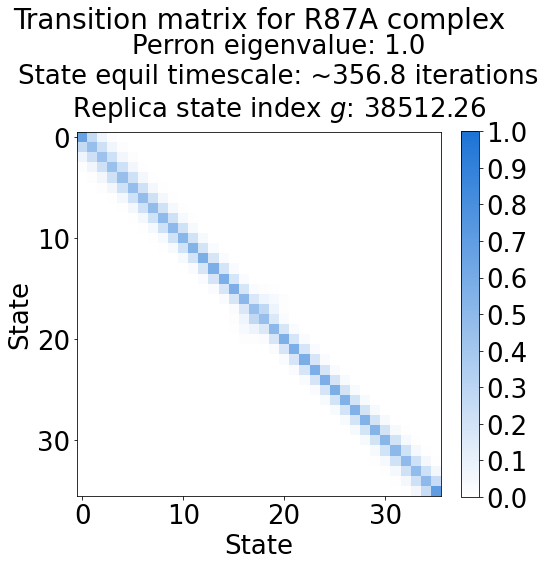

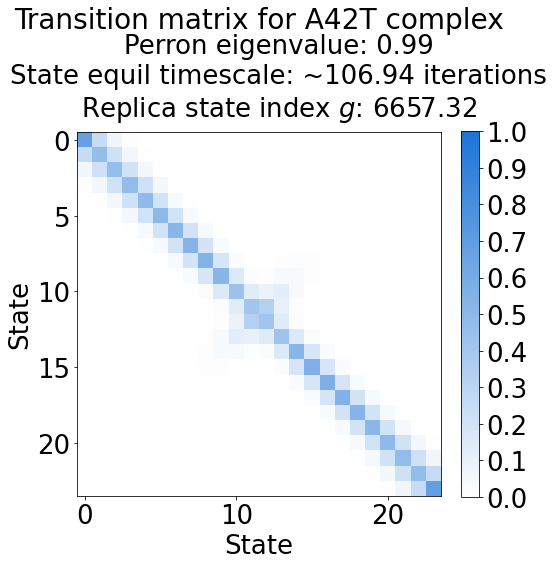

In [9]:
main_dir = 52
phase = 'complex'
replicate = 0
sub_dirs = [12, 17]
mutations = ["R87A", "A42T"]

for sub_dir, mutation in tqdm_notebook(zip(sub_dirs, mutations)):
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}.nc"
    
#     # Get mixing data
#     reporter = MultiStateReporter(filename, open_mode='r')
#     analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=50000)
#     transition_matrix, eigenvalues, statistical_inefficiency = analyzer.generate_mixing_statistics()

#     # Save pickle
#     mixing_data = [transition_matrix, eigenvalues, statistical_inefficiency]
#     with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "wb") as f:
#         pickle.dump(mixing_data, f)
    
    # Load data
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_{phase}_mixing_data.pickle", "rb") as f:
        mixing_data = pickle.load(f)
        transition_matrix, eigenvalues, statistical_inefficiency = mixing_data
    
    # Generate plot
    save_path = f"{os.path.splitext(filename)[0]}_mixing_50ns.pdf"
    generate_mixing_plot(transition_matrix, eigenvalues, statistical_inefficiency, mutation, phase, save_path=save_path)
